# 1. Loading templates

In [21]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import plotly.graph_objects as go
from tqdm.notebook import tqdm
import joblib
import json
import yaml
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# load workspace
workspace_file = 'templates1_47.json'
#results = 'results_3.yaml'

with open(workspace_file, encoding="utf-8") as ws_file:
    ws = json.load(ws_file)
electron_channel = ws['channels'][0]
samples_name = [s['name'] for s in electron_channel['samples']]
templates = np.array([s['data'] for s in electron_channel['samples']])

# 2. Loading data

In [9]:
# NumberOfEvents = {'small_pDl':{},'large_pDl':{}}
# for name, sample in samples.items():
#     if name in ['bkg_continuum','bkg_fakeDTC','bkg_fakeB','bkg_others']:
#         continue
#     NumberOfEvents['small_pDl'][name]=len(sample.query('p_D_l<2.5'))
#     NumberOfEvents['large_pDl'][name]=len(sample.query('p_D_l>2.5'))
# NumberOfEvents


## counts.shape=(41,47), the first dimension is p_D_l, counts_small_pDl.shape=(20,47)
# counts_small_pDl = counts[:p_D_l_slice_index[0]]
# counts_large_pDl = counts[p_D_l_slice_index[0]:]

# indices_non_zero_small_pDl = np.where(counts_small_pDl != 0)
# indices_non_zero_large_pDl = np.where(counts_large_pDl != 0)
# data_small_pDl = counts_small_pDl[indices_non_zero_small_pDl]
# data_large_pDl = counts_large_pDl[indices_non_zero_large_pDl]
# templates_small_pDl = [t.reshape(counts.shape)[:p_D_l_slice_index[0]][indices_non_zero_small_pDl] for t in templates]
# templates_large_pDl = [t.reshape(counts.shape)[p_D_l_slice_index[0]:][indices_non_zero_large_pDl] for t in templates]

# templates_small_pDl_2d = [t.reshape(counts.shape)[:p_D_l_slice_index[0]] for t in templates]
# templates_large_pDl_2d = [t.reshape(counts.shape)[p_D_l_slice_index[0]:] for t in templates]

# data_small_pDl_2d = counts[:p_D_l_slice_index[0]]
# data_large_pDl_2d = counts[p_D_l_slice_index[0]:]

In [23]:
# load testing workspace
workspace_file_test = 'test_data.json' #'test_data.json'
rng = np.random.default_rng(0)

with open(workspace_file_test, encoding="utf-8") as ws_file:
    ws_test = json.load(ws_file)
electron_channel_test = ws_test['channels'][0]
samples_name_test = [s['name'] for s in electron_channel_test['samples']]
test0 = np.array([s['data'] for s in electron_channel_test['samples']])
test1=rng.poisson(test0) # poisson sampling the test templates
counts=np.sum(test0,axis=0).reshape(41,47) #41,47

for i, [name,t0,t1] in enumerate(zip(samples_name_test, test0, test1)):
    print(i, name, int(np.sum(t0)), np.sum(t1))

0 $D\tau\nu$ 2884 3012
1 $D^\ast\tau\nu$ 1465 1401
2 $D^{\ast\ast}\tau\nu$ 886 884
3 $D\ell\nu$ 45051 44954
4 $D^\ast\ell\nu$ 30105 30020
5 $D^{\ast\ast}\ell\nu$ 20253 20268


In [52]:
# # 2d templates and data
# xedges = np.linspace(-2, 10, 48) # -7.5 for weMiss2, -2 for weMiss3, -2.5 for weMiss4
# yedges = np.linspace(0.4, 4.6, 42)
# temp = [i.reshape(41,47) for i in templates]
# # data = counts.ravel().to_list()
# data = counts
# init_yields = [3000]*6

# 3. Fitting with iminuit

In [34]:
from iminuit import Minuit
from iminuit.cost import poisson_chi2, Template
from IPython.display import display

indices_non_zero = np.where(np.sum(templates,axis=0).reshape(41,47) != 0)
temp = [i.reshape(41,47)[indices_non_zero] for i in templates]
# data = counts.ravel().to_list()
data = counts[indices_non_zero]
edges = np.linspace(0, len(data), len(data)+1)
truth = np.array([int(np.sum(t0)) for t0 in test0])

# for plotting projections
templates_2d = [t.reshape(counts.shape) for t in templates]
data_2d = counts


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.

E VariableMetricBuilder Initial matrix not pos.def.
E Variable


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E Variable


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E Variabl


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableM

In [15]:
# fit in 2 steps
# split templates and data at p_D_l==2.5
xedges = np.linspace(-2, 10, 48) # -7.5 for weMiss2, -2 for weMiss3, -2.5 for weMiss4
yedges = np.linspace(0.4, 4.6, 42)

pDl_split = 2.5
mm2_split = 2
pDl_split_index, = np.asarray(np.isclose(yedges,pDl_split,atol=0.2)).nonzero()
mm2_split_index, = np.asarray(np.isclose(xedges,mm2_split,atol=0.2)).nonzero()

# create a boolean array as a mask for fitting
mask_2d = np.zeros((41,47), dtype=bool)
mask_2d[pDl_split_index[0]:,:mm2_split_index[0]] = True # select the large pDl and small mm2
mask_1d = mask_2d[indices_non_zero]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 219.3 (χ²/ndof = 0.9)      │              Nfcn = 138              │
│ EDM = 4.18e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name                  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ $D\tau\nu$            │    0.0    │    0.1    │            │            │    0    │         │  yes  │
│ 1 │ $D^\ast\tau\nu$       │    0.0    │    0.1    │            │            │    0    │         │  yes  │
│ 2 │ $D^{\ast\ast}\tau\nu$ │    0.0    │    0.1    │            │            │    0    │         │  yes  │
│ 3 │ $D\ell\nu$            │  45.9e3   │   0.6e3   │            │            │    0    │         │       │
│ 4 │ $D^\ast\ell\nu$       │  27.9e3   │   1.1e3   │            │            │    0    │         │       │
│ 5 │ $D^{\ast\ast}\ell\nu$ │  25.2e3   │   1.1e3   │            │            │    0    │         │       │
└───┴───────────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                       │            $D\tau\nu$       $D^\ast\tau\nu$ $D^{\ast\ast}\tau\nu$            $D\ell\nu$       $D^\ast\ell\nu$ $D^{\ast\ast}\ell\nu$ │
├───────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            $D\tau\nu$ │                     0                     0                     0                     0                     0                     0 │
│       $D^\ast\tau\nu$ │                     0                     0                     0                     0                     0                     0 │
│ $D^{\ast\ast}\tau\nu$ │                     0                     0                     0                     0                     0                     0 │
│            $D\ell\nu$ │                     0                     0                     0              3.99e+05                -0.5e6                 0.3e6 │
│       $D^\ast\ell\nu$ │                     0                     0                     0                -0.5e6              1.11e+06                -0.9e6 │
│ $D^{\ast\ast}\ell\nu$ │                     0                     0                     0                 0.3e6                -0.9e6              1.24e+06 │
└───────────────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

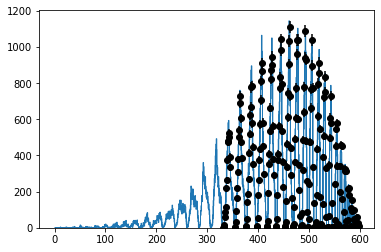

In [16]:
c0 = Template(data, edges, temp, method="da")
# we set the signal amplitude to zero and fix all signal yields
yields2 = [0,0,0,45000,30000,20000]
m0 = Minuit(c0, *yields2, name=samples_name)

m0.limits = (0, None)
m0.fixed[r'$D\tau\nu$',r'$D^\ast\tau\nu$',r'$D^{\ast\ast}\tau\nu$'] = True

# we temporarily mask out the signal region
c0.mask = mask_1d

m0.simplex().migrad(ncall=1000000)
m0.hesse()
#m0.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 461.2 (χ²/ndof = 1.3)      │              Nfcn = 988              │
│ EDM = 2.78e-05 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name                  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ $D\tau\nu$            │  0.28e3   │  0.20e3   │  -0.16e3   │   0.24e3   │    0    │         │       │
│ 1 │ $D^\ast\tau\nu$       │  0.21e3   │  0.20e3   │  -0.15e3   │   0.27e3   │    0    │         │       │
│ 2 │ $D^{\ast\ast}\tau\nu$ │  2.45e3   │  0.23e3   │  -0.27e3   │   0.21e3   │    0    │         │       │
│ 3 │ $D\ell\nu$            │  45.9e3   │   0.6e3   │            │            │    0    │         │  yes  │
│ 4 │ $D^\ast\ell\nu$       │  27.9e3   │   1.1e3   │            │            │    0    │         │  yes  │
│ 5 │ $D^{\ast\ast}\ell\nu$ │  25.2e3   │   1.1e3   │            │            │    0    │         │  yes  │
└───┴───────────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │      $D\tau\nu$       │    $D^\ast\tau\nu$    │ $D^{\ast\ast}\tau\nu$ │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.16e3  │  0.24e3   │  -0.15e3  │  0.27e3   │  -0.27e3  │  0.21e3   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                       │            $D\tau\nu$       $D^\ast\tau\nu$ $D^{\ast\ast}\tau\nu$            $D\ell\nu$       $D^\ast\ell\nu$ $D^{\ast\ast}\ell\nu$ │
├───────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            $D\tau\nu$ │              3.96e+04               -0.01e6               -0.02e6                     0                     0                     0 │
│       $D^\ast\tau\nu$ │               -0.01e6              4.05e+04               -0.03e6                     0                     0                     0 │
│ $D^{\ast\ast}\tau\nu$ │               -0.02e6               -0.03e6              5.25e+04                     0                     0                     0 │
│            $D\ell\nu$ │                     0                     0                     0                     0                     0                     0 │
│       $D^\ast\ell\nu$ │                     0                     0                     0                     0          

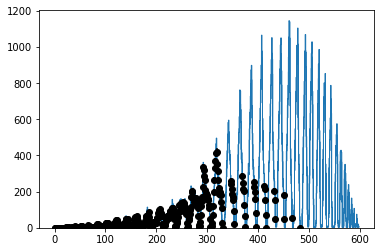

In [17]:
c0.mask = None # remove mask
m0.fixed = False # release all parameters
m0.fixed[r'$D\ell\nu$',r'$D^\ast\ell\nu$',r'$D^{\ast\ast}\ell\nu$'] = True # fix normalization amplitude
m0.values[r'$D\tau\nu$',r'$D^\ast\tau\nu$',r'$D^{\ast\ast}\tau\nu$'] = 10000 # do not start at the limit
# temporarily mask out the norm region
c0.mask = ~mask_1d
m0.simplex().migrad()
#m0.scipy(constraints=NonlinearConstraint(lambda *yields: yields[0]/yields[1] - yields[3]/yields[4] * 1.5, 0, 0))
m0.hesse()
m0.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 415 (χ²/ndof = 1.2)        │             Nfcn = 1507              │
│ EDM = 5.24e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name                  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ $D\tau\nu$            │   2.4e3   │   0.7e3   │            │            │    0    │         │       │
│ 1 │ $D^\ast\tau\nu$       │  0.22e3   │  0.22e3   │            │            │    0    │         │       │
│ 2 │ $D^{\ast\ast}\tau\nu$ │   1.8e3   │   0.4e3   │            │            │    0    │         │       │
│ 3 │ $D\ell\nu$            │   45e3    │    4e3    │            │            │    0    │         │       │
│ 4 │ $D^\ast\ell\nu$       │  28.4e3   │   1.4e3   │            │            │    0    │         │       │
│ 5 │ $D^{\ast\ast}\ell\nu$ │  20.8e3   │   0.7e3   │            │            │    0    │         │       │
└───┴───────────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                       │            $D\tau\nu$       $D^\ast\tau\nu$ $D^{\ast\ast}\tau\nu$            $D\ell\nu$       $D^\ast\ell\nu$ $D^{\ast\ast}\ell\nu$ │
├───────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            $D\tau\nu$ │              4.99e+05               -0.02e6               -0.24e6                -0.2e6                 0.1e6                -0.4e6 │
│       $D^\ast\tau\nu$ │               -0.02e6              6.28e+04               -0.04e6                0.01e6                    -0                    -0 │
│ $D^{\ast\ast}\tau\nu$ │               -0.24e6               -0.04e6              1.77e+05                0.06e6               -0.04e6                0.14e6 │
│            $D\ell\nu$ │                -0.2e6                0.01e6                0.06e6              1.98e+07                -4.4e6                 0.5e6 │
│       $D^\ast\ell\nu$ │                 0.1e6                    -0               -0.04e6                -4.4e6              1.91e+06                -0.3e6 │
│ $D^{\ast\ast}\ell\nu$ │                -0.4e6                    -0                0.14e6                 0.5e6                -0.3e6              4.87e+05 │
└───────────────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

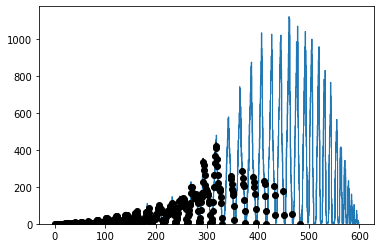

In [21]:
m0.fixed = None
m0.simplex().migrad()

In [ ]:
m0.draw_mnmatrix(figsize=(16,16));

## Barlow-Beeston method

In [34]:
class BB:
    def __init__(self, data, temp):
        # data, template are input argument of the class itself
        self.data = data, temp

    def __call__(self, par):
        # get number of bins and components from data, template
        data, temp = self.data
        bins = len(data)
        nComp = temp.shape[0]
        # formate fitting parameters
        yields = par[:nComp]
        nuisances = par[nComp:]
        temp_nuisances = [nuisances[x:x+bins] for x in np.arange(nComp)*bins]
        # initialize cost function calculation
        fitted_total = 0 # fitted count at each bin
        cost = 0
        # calculate the cost function
        for y, t_nui, i in zip(yields, temp_nuisances, range(len(yields))):
            fitted_total += y * t_nui / np.sum(t_nui)
            cost += poisson_chi2(temp[i], t_nui)
        cost += poisson_chi2(data, fitted_total)
        return cost

    @property
    def ndata(self):
        data, temp = self.data
        return np.prod(data.shape) + np.prod(temp.shape)
    
    def errordef(self):
        return Minuit.LEAST_SQUARES

In [ ]:
m1 = Minuit(BB(data, temp), np.concatenate([init_yields, np.concatenate(temp)]))
m1.limits = (0, None)
m1.migrad(ncall=100000)
m1.hesse()

## Barlow-Beeston-Lite method

In [ ]:
# 2d templates and data
c2 = Template(data, [yedges,xedges], temp, method="da")
m2 = Minuit(c2, *init_yields, name=samples_name)
m2.limits = (0, None)
m2.simplex().migrad()
m2.hesse()
#m2.minos()

In [ ]:
# scipy minimizer

plt.figure(figsize=(16,8))
plt.title('scipy minimizer')
from scipy.optimize import NonlinearConstraint
c3 = Template(data, edges, temp, method="da") # 'jsc', 'asy'
m3 = Minuit(c3, *init_yields, name=samples_name)
m3.limits = (None, None)
m3.scipy(constraints=NonlinearConstraint(lambda *yields: yields[0]/yields[1] - yields[3]/yields[4] * 1.5, 0, 0))
m3.hesse()
#m3.minos()

E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 622.7 (χ²/ndof = 1.0)      │             Nfcn = 1504              │
│ EDM = 1.82e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name                  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ $D\tau\nu$            │   2.2e3   │   0.5e3   │   -0.5e3   │   0.5e3    │    0    │         │       │
│ 1 │ $D^\ast\tau\nu$       │   1.8e3   │   0.6e3   │   -0.6e3   │   0.5e3    │    0    │         │       │
│ 2 │ $D^{\ast\ast}\tau\nu$ │  0.61e3   │  0.36e3   │  -0.29e3   │   0.43e3   │    0    │         │       │
│ 3 │ $D\ell\nu$            │  45.4e3   │   0.5e3   │   -0.5e3   │   0.5e3    │    0    │         │       │
│ 4 │ $D^\ast\ell\nu$       │  30.1e3   │   0.6e3   │   -0.6e3   │   0.6e3    │    0    │         │       │
│ 5 │ $D^{\ast\ast}\ell\nu$ │  20.25e3  │  0.20e3   │            │            │    0    │         │  yes  │
└───┴───────────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │      $D\tau\nu$       │    $D^\ast\tau\nu$    │ $D^{\ast\ast}\tau\nu$ │      $D\ell\nu$       │    $D^\ast\ell\nu$    │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.5e3   │   0.5e3   │  -0.6e3   │   0.5e3   │  -0.29e3  │  0.43e3   │  -0.5e3   │   0.5e3   │  -0.6e3   │   0.6e3   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                       │            $D\tau\nu$       $D^\ast\tau\nu$ $D^{\ast\ast}\tau\nu$            $D\ell\nu$       $D^\ast\ell\nu$ $D^{\ast\ast}\ell\nu$ │
├───────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            $D\tau\nu$ │              2.76e+05               -0.21e6                0.01e6                0.02e6               -0.05e6                     0 │
│       $D^\ast\tau\nu$ │               -0.21e6              3.32e+05               -0.15e6               -0.01e6                0.03e6                     0 │
│ $D^{\ast\

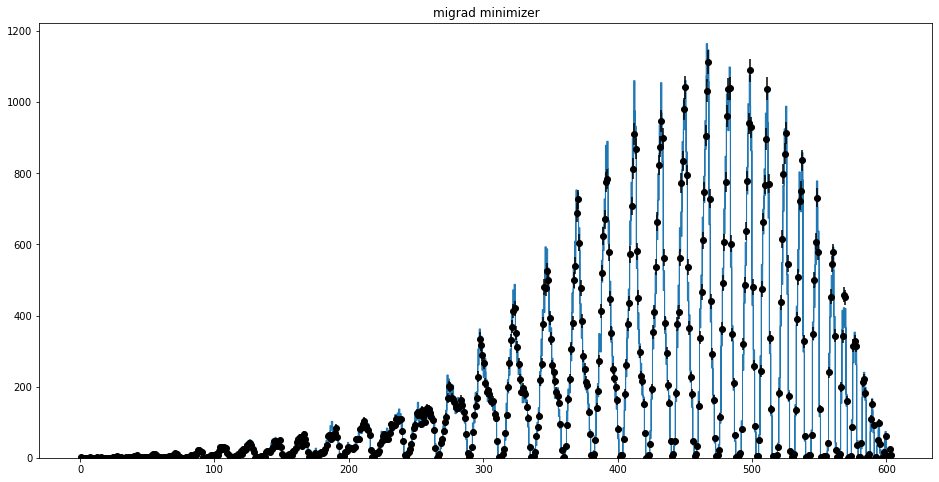

In [26]:
# migrad minimizer

plt.figure(figsize=(16,8))
plt.title('migrad minimizer')
c4 = Template(data, edges, temp, method="da") # 'jsc', 'asy'

# def modified_c4(a,d,e,f):
#     b = a*e/d/1.4
#     c = a*f/d/1.3
#     return c4(a,b,c,d,e,f)

m4 = Minuit(c4, *init_yields, name=samples_name)
m4.fixed[r'$D^{\ast\ast}\ell\nu$'] = True
m4.limits = (0, None)
m4.simplex().migrad()
m4.hesse()
m4.minos()

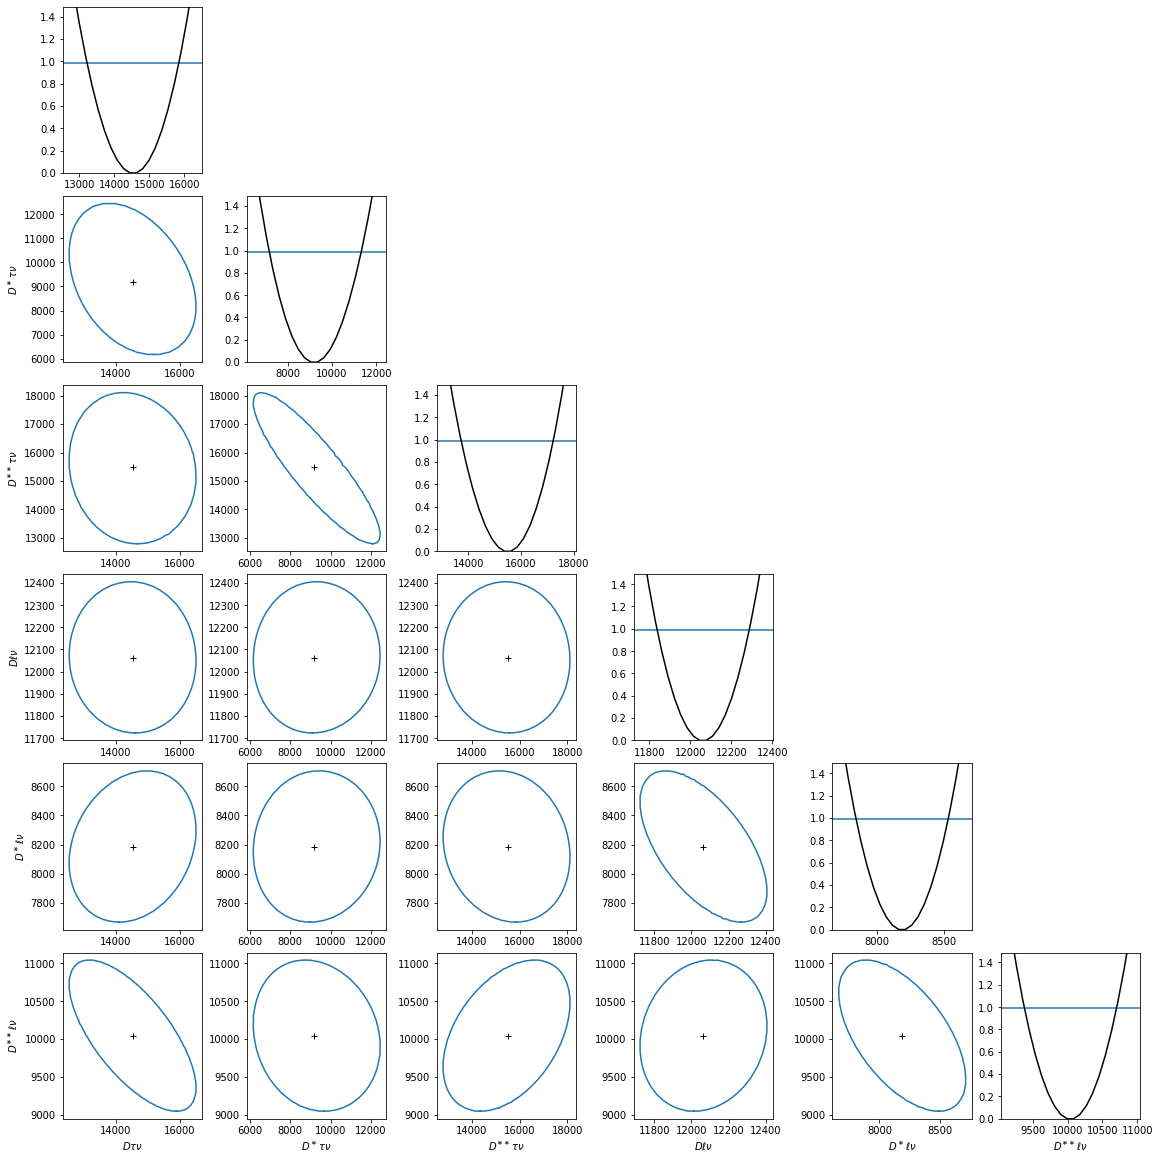

In [7]:
m4.draw_mnmatrix(figsize=(16,16));

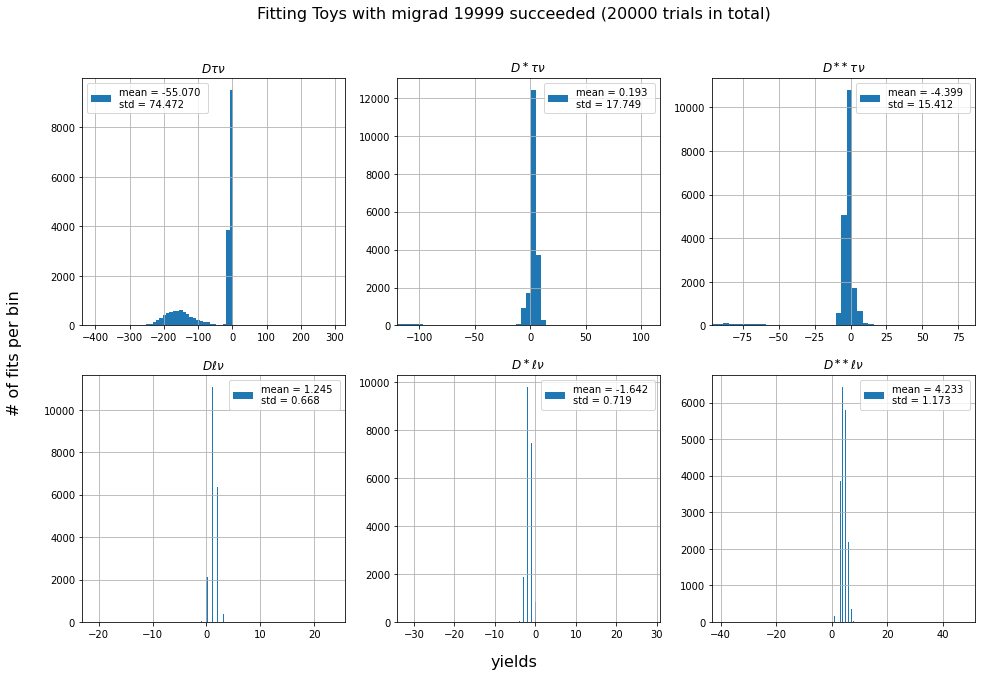

In [36]:
# import warnings
# # suppress warning messages from iminuit
# warnings.filterwarnings("ignore", message="E VariableMetricBuilder Initial matrix not pos.def.")
def statistics(df):
    mean=df.mean()
    std=df.std()
    return f'''mean = %5.3f \nstd = %5.3f''' %(mean,std)

truth = np.array([int(np.sum(t0)) for t0 in test0])
def pull(m):
    return (np.array(m.values) - truth)/np.array(m.errors)
    
@joblib.delayed
def compute_toys(itry,init_yields):
    rng = np.random.default_rng(itry)
    toy = rng.poisson(data)
    cost = Template(toy, edges, temp, method="da")
    m = Minuit(cost, *init_yields, name=samples_name)
    m.limits = (0, None)
    m.migrad(ncall=1000000);
    return list(pull(m)) if m.valid else None
#     return list(m.values) if m.valid else None

# run 1000 toys
ntoys=20000
toys_migrad = joblib.Parallel(-1)(compute_toys(i,init_yields) for i in range(ntoys))
toys_migrad = [v for v in toys_migrad if v is not None]
# save successful fits to a df
df_toys = pd.DataFrame(toys_migrad,columns=samples_name).round(0)


fig,axs =plt.subplots(2,3,figsize=(16,10))
fig.suptitle(f'Fitting Toys with migrad {len(df_toys)} succeeded ({ntoys} trials in total)',fontsize=16)
fig.supylabel('# of fits per bin',x=0.06,fontsize=16)
fig.supxlabel(f'yields', y=0.06,fontsize=16)
i=0
j=0
for col in df_toys.columns:
    comp=df_toys[col]
    comp_filtered=comp.loc[(comp>comp.mean()-5*comp.std())&(comp<comp.mean()+5*comp.std())]
    axs[i,j].hist(comp_filtered,label=statistics(comp_filtered),bins=30)
    axs[i,j].grid()
    axs[i,j].set_title(col)
    axs[i,j].set_xlim([comp.mean()-5*comp.std(),comp.mean()+5*comp.std()])
    axs[i,j].legend()
    j+=1
    if j==3:
        i+=1
        j=0

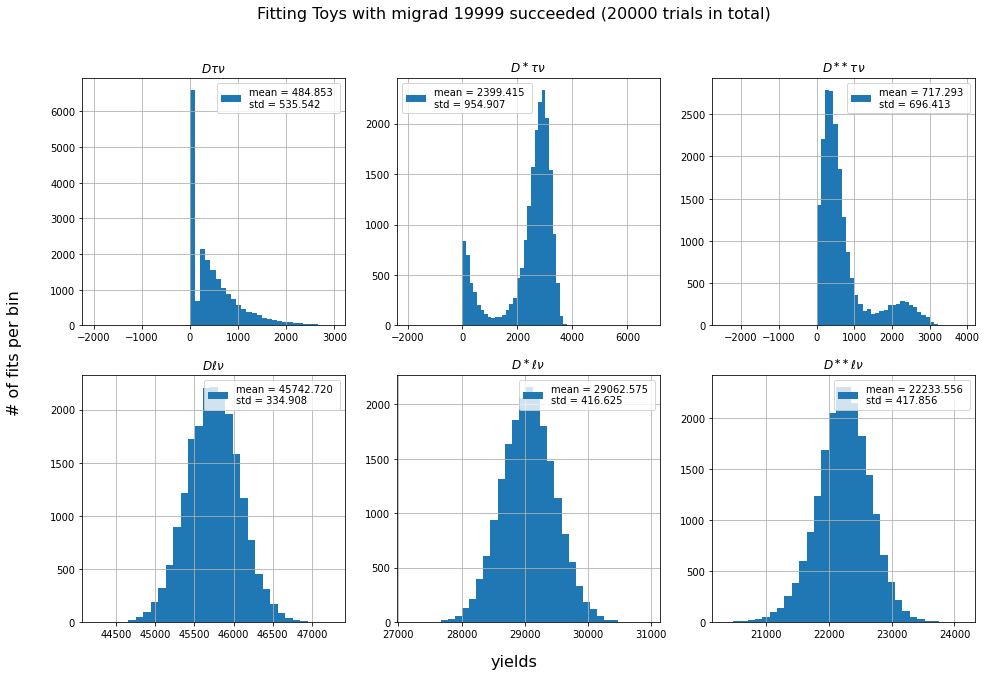

In [35]:
# import warnings
# # suppress warning messages from iminuit
# warnings.filterwarnings("ignore", message="E VariableMetricBuilder Initial matrix not pos.def.")
def statistics(df):
    mean=df.mean()
    std=df.std()
    return f'''mean = %5.3f \nstd = %5.3f''' %(mean,std)
    
@joblib.delayed
def compute_toys(itry,init_yields):
    rng = np.random.default_rng(itry)
    toy = rng.poisson(data)
    cost = Template(toy, edges, temp, method="da")
    m = Minuit(cost, *init_yields, name=samples_name)
    m.limits = (0, None)
    m.migrad(ncall=1000000);
    return list(m.values) if m.valid else None

# run 1000 toys
ntoys=20000
toys_migrad = joblib.Parallel(-1)(compute_toys(i,init_yields) for i in range(ntoys))
toys_migrad = [v for v in toys_migrad if v is not None]
# save successful fits to a df
df_toys = pd.DataFrame(toys_migrad,columns=samples_name).round(0)


fig,axs =plt.subplots(2,3,figsize=(16,10))
fig.suptitle(f'Fitting Toys with migrad {len(df_toys)} succeeded ({ntoys} trials in total)',fontsize=16)
fig.supylabel('# of fits per bin',x=0.06,fontsize=16)
fig.supxlabel(f'yields', y=0.06,fontsize=16)
i=0
j=0
for col in df_toys.columns:
    comp=df_toys[col]
    comp_filtered=comp.loc[(comp>comp.mean()-5*comp.std())&(comp<comp.mean()+5*comp.std())]
    axs[i,j].hist(comp_filtered,label=statistics(comp_filtered),bins=30)
    axs[i,j].grid()
    axs[i,j].set_title(col)
    axs[i,j].set_xlim([comp.mean()-5*comp.std(),comp.mean()+5*comp.std()])
    axs[i,j].legend()
    j+=1
    if j==3:
        i+=1
        j=0

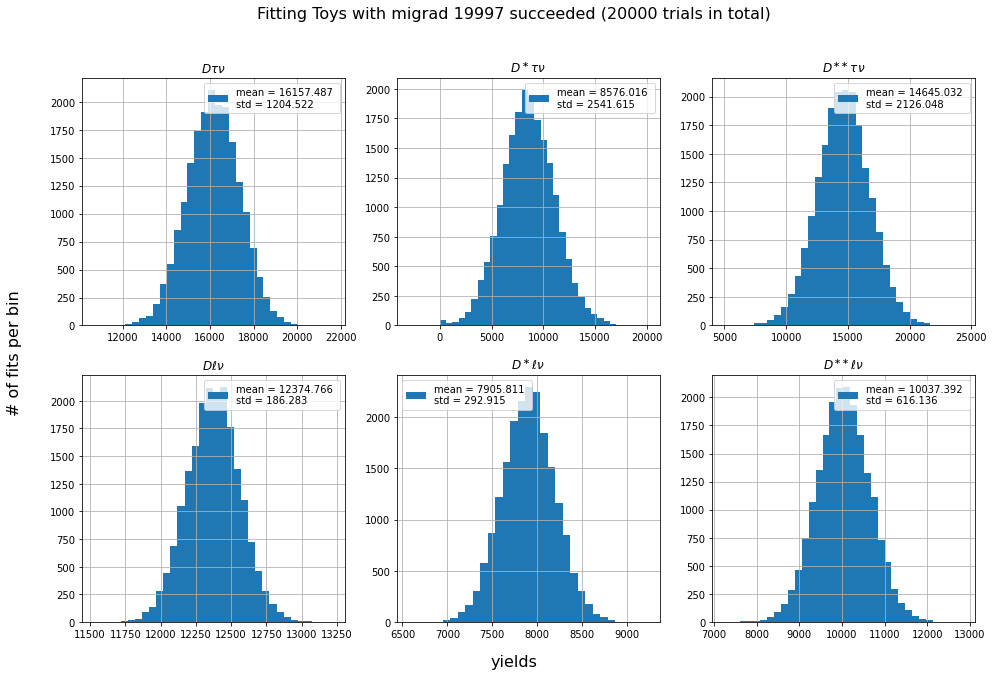

In [20]:
# import warnings
# # suppress warning messages from iminuit
# warnings.filterwarnings("ignore", message="E VariableMetricBuilder Initial matrix not pos.def.")
def statistics(df):
    mean=df.mean()
    std=df.std()
    return f'''mean = %5.3f \nstd = %5.3f''' %(mean,std)
    
@joblib.delayed
def compute_toys(itry,init_yields):
    rng = np.random.default_rng(itry)
    toy = rng.poisson(data)
    cost = Template(toy, edges, temp, method="da")
    m = Minuit(cost, *init_yields, name=samples_name)
    m.limits = (0, None)
    m.migrad();
    return list(m.values) if m.valid else None

# run 1000 toys
ntoys=20000
toys_migrad = joblib.Parallel(-1)(compute_toys(i,init_yields) for i in range(ntoys))
toys_migrad = [v for v in toys_migrad if v is not None]
# save successful fits to a df
df_toys = pd.DataFrame(toys_migrad,columns=samples_name).round(0)


fig,axs =plt.subplots(2,3,figsize=(16,10))
fig.suptitle(f'Fitting Toys with migrad {len(df_toys)} succeeded ({ntoys} trials in total)',fontsize=16)
fig.supylabel('# of fits per bin',x=0.06,fontsize=16)
fig.supxlabel(f'yields', y=0.06,fontsize=16)
i=0
j=0
for col in df_toys.columns:
    comp=df_toys[col]
    comp_filtered=comp.loc[(comp>comp.mean()-5*comp.std())&(comp<comp.mean()+5*comp.std())]
    axs[i,j].hist(comp_filtered,label=statistics(comp_filtered),bins=30)
    axs[i,j].grid()
    axs[i,j].set_title(col)
    axs[i,j].set_xlim([comp.mean()-5*comp.std(),comp.mean()+5*comp.std()])
    axs[i,j].legend()
    j+=1
    if j==3:
        i+=1
        j=0

In [ ]:
0 $D\tau\nu$ 17474 17547
1 $D^\ast\tau\nu$ 8124 8002
2 $D^{\ast\ast}\tau\nu$ 14310 14358
3 $D\ell\nu$ 12236 12118
4 $D^\ast\ell\nu$ 8181 8163
5 $D^{\ast\ast}\ell\nu$ 9371 9328

In [109]:
def calculate_R(m):
    tau_e_BF = 0.17
    eff_D_tau_nu = 12194/50000
    #eff_D_tau_nu_err = eff_D_tau_nu*np.sqrt(1/12194 + 1/50000)
    eff_D_l_nu = 14108/50000
    #eff_D_l_nu_err = eff_D_l_nu*np.sqrt(1/14108 + 1/50000)
    R_D = m.values[r'$D\tau\nu$']/m.values[r'$D\ell\nu$']/tau_e_BF * eff_D_l_nu/eff_D_tau_nu
    R_D_err = R_D*np.sqrt( (m.errors[r'$D\tau\nu$']/m.values[r'$D\tau\nu$'])**2 + (m.errors[r'$D\ell\nu$']/m.values[r'$D\ell\nu$'])**2 + 1/12194 + 1/50000 + 1/14108 + 1/50000)

    eff_Dst_tau_nu = 2260/10000
    eff_Dst_l_nu = 2466/10000
    R_Dst = m.values[r'$D^\ast\tau\nu$']/m.values[r'$D^\ast\ell\nu$']/tau_e_BF * eff_Dst_l_nu/eff_Dst_tau_nu
    R_Dst_err = R_Dst*np.sqrt( (m.errors[r'$D^\ast\tau\nu$']/m.values[r'$D^\ast\tau\nu$'])**2 + (m.errors[r'$D^\ast\ell\nu$']/m.values[r'$D^\ast\ell\nu$'])**2 + 1/2260 + 1/10000 + 1/2466 + 1/10000)

    print(f'{R_D = :.3f} ± {R_D_err:.3f}')
    print(f'{R_Dst = :.3f} ± {R_Dst_err:.3f}')
    
calculate_R(m2)

R_D = 0.291 ± 0.042
R_Dst = 0.226 ± 0.049


In [112]:
calculate_R(m4)

R_D = 0.306 ± 0.041
R_Dst = 0.215 ± 0.054


# Plot the fitting results

## Plot with mplhep or plt.bar()

In [9]:
xedges = np.linspace(-2, 10, 48) # -7.5 for weMiss2, -2 for weMiss3, -2.5 for weMiss4
yedges = np.linspace(0.4, 4.6, 42)

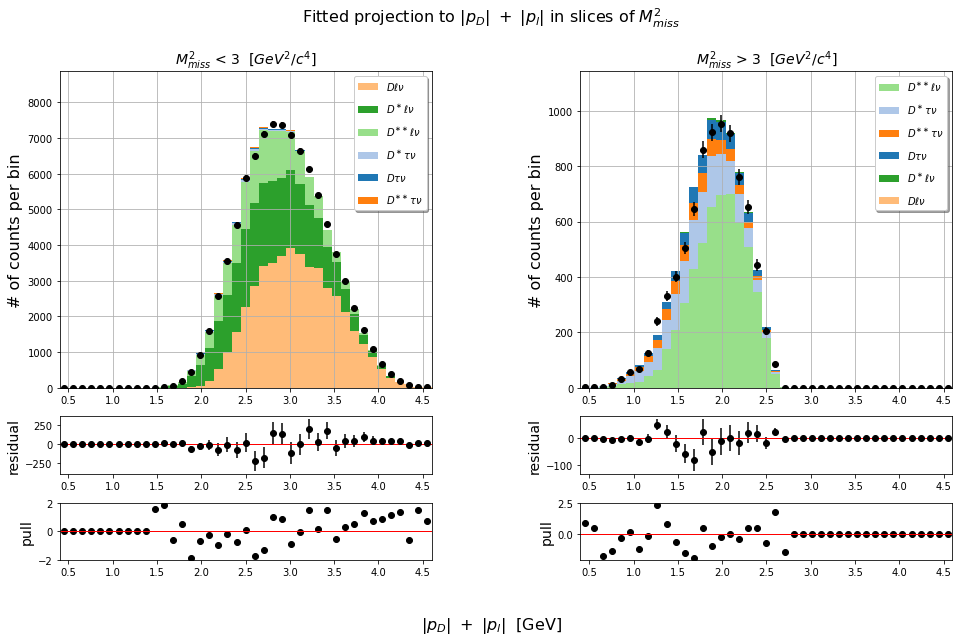

In [10]:
util.mpl_projection_residual(m4, templates_2d, data_2d, edges=[xedges,yedges], slices=[3,1.5],direction='p_D_l',plot_with='pltbar')

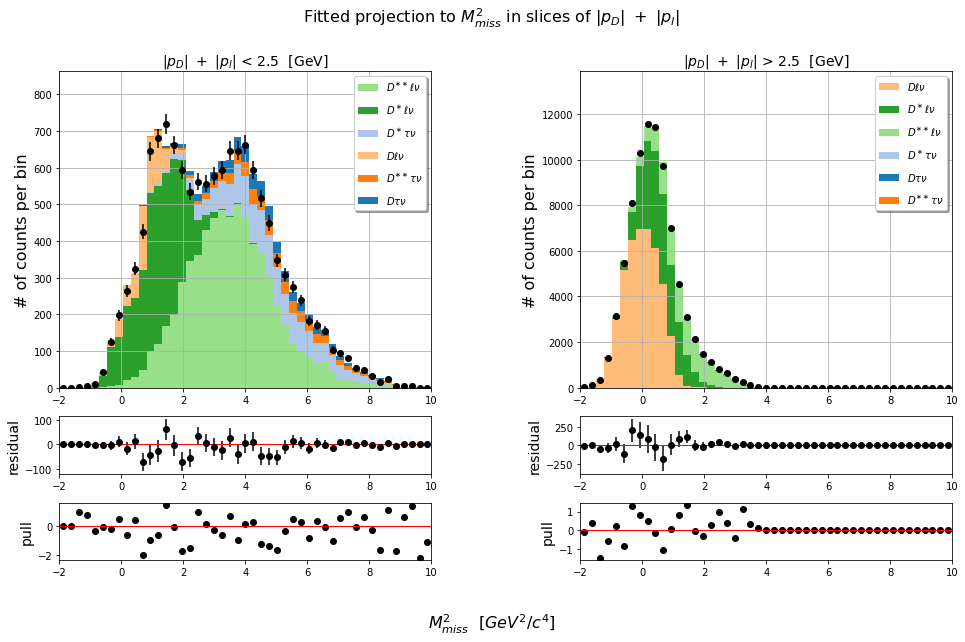

In [11]:
util.mpl_projection_residual(m4, templates_2d, data_2d, edges=[xedges,yedges], slices=[3,2.5],direction='mm2',plot_with='pltbar')

In [215]:
util.ply_projection_residual(m4, templates_2d, data_2d, edges=[xedges,yedges], slices=[1.6,1],direction='mm2')